In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

Dataset from https://oralytics.com/2020/02/24/irish-whiskey-distilleries-data-set/

In [71]:
Whiskey = gpd.read_file('/Users/martincody/Downloads/Irish_Whiskey_Distilleries.csv')

In [115]:
type(Whiskey)

geopandas.geodataframe.GeoDataFrame

In [116]:
Whiskey.head()

,DISTILLERY,COUNTY,ADDRESS,EIRCODE,NI_POSTCODE,TOURS,WEB_SITE,TWITTER,LAT,LONG,NOTES_PARENT_COMPANY,geometry
0,Ballykeefe Distillery,Kilkenny,"Kyle, Ballykeefe, Cuffsgrange, County Kilkenny...",R95 NR50,,Yes,https://ballykeefedistillery.ie,@BallykeefeD,52.602034,-7.375774,Ging Family,None
1,Belfast Distillery,Antrim,"Crumlin Road Goal, Crumlin Road, Belfast, BT14...",,BT14 6ST,No,http://www.belfastdistillery.com,@BDCIreland,54.609718,-5.941994,J&J McConnell,None
2,Blacks Distillery,Cork,"Farm Lane, Kinsale, Co. Cork",P17 XW70,,No,https://www.blacksbrewery.com,@BlacksBrewery,51.710969,-8.515579,,None
3,Blackwater,Waterford,"Church Road, Ballinlevane East, Ballyduff, Co....",P51 C5C6,,No,https://blackwaterdistillery.ie/,@BlackDistillery,52.147581,-8.052973,,None
4,Boann,Louth,"Lagavooren, Platin Rd., Drogheda, Co. Louth, A...",A92 X593,,Yes,http://boanndistillery.ie/,@Boanndistillery,53.69459,-6.366558,Cooney Family,None


<AxesSubplot:xlabel='LONG', ylabel='LAT'>

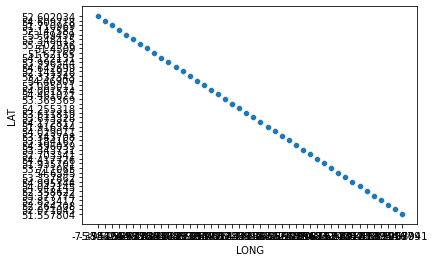

In [147]:
sns.scatterplot(data=Whiskey, x='LONG', y='LAT')


In [142]:
map=gpd.read_file('/Users/martincody/Downloads/counties/counties.shp')

<AxesSubplot:>

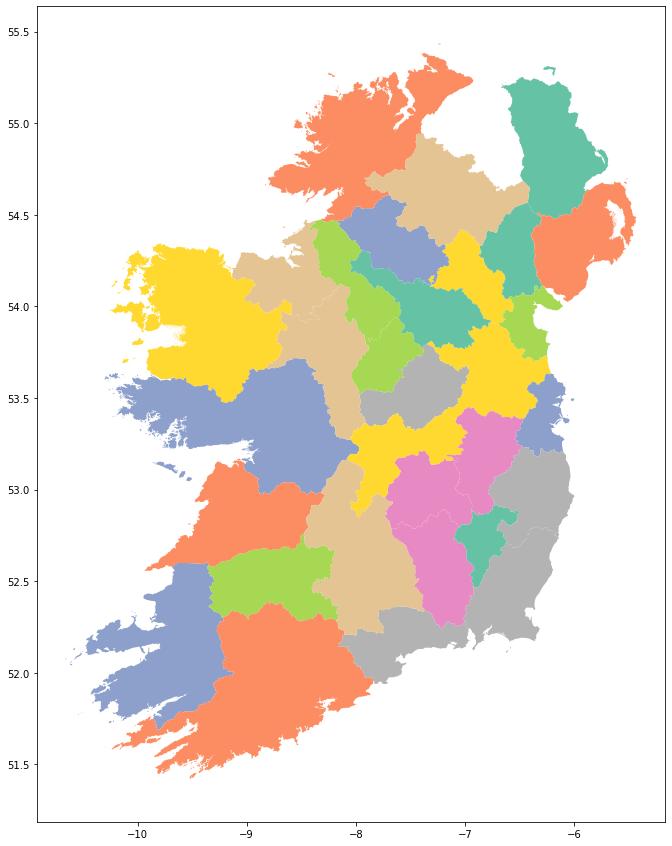

In [143]:
map.plot(figsize=(15,15), column='NAME_EN', cmap='Set2')